# COVID-19 CASES in PA #
Data Source: https://www.health.pa.gov/topics/disease/coronavirus/Pages/Archives.aspx

## How to Extract the Datasets from Website##
```
Run Webscraper: python data_extractor_pa.py
```
* The following datasets are extracted from PA Health of Health
    * pa_summary.csv
        * summary of positive/negative cases and deaths to date
    * pa_county.csv
        * positive cases and deaths to date group by county)
    * pa_county_geolocation.csv
        * latitude and longitude for each county
        * Lat/Long are obtained from calling MapQuest Geocoding API
        
 --------
 

## How to Analyze and Visualize Data ##

* Pandas to load and analuze the CSV datasets
* matlibplot for simple line and bar charts
* Folium for to show Data Map

--------


In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like

In [3]:
# Load Summary Dataset
df = pd.read_csv("pa_summary.csv")
df.head(5)

,Date,Negative,Positive,Deaths
0,2020-04-04,60013,10017,136
1,2020-04-03,53695,8420,102
2,2020-04-02,47698,7016,90
3,2020-04-01,42427,5805,74
4,2020-03-31,37645,4843,63


## Dataset Extraction:

```
Run Webscraper: python data_extractor_pa.py
```

* The following datasets are extracted from PA Health of Health
    * pa_summary.csv 
        * summary of positive/negative cases and deaths to date
    * pa_county.csv
        * positive cases and deaths to date group by county)
    * pa_county_geolocation.csv
        * latitude and longitude for each county
        * Lat/Long are obtained from calling MapQuest Geocoding API

### Compute Total Tested Population and Percentages

In [4]:
# Sum of Positive and Negative as Total Tested Population
df['Tested'] = df['Positive'] + df['Negative']
df['Positive_Percent'] = round(100*df['Positive']/df['Tested'], 1)
df['Negative_Percent'] = round(100*df['Negative']/ df['Tested'], 1)
df['Death_Percent'] = round(100*df['Deaths']/ df['Tested'], 3)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
0,2020-04-04,60013,10017,136,70030,14.3,85.7,0.194
1,2020-04-03,53695,8420,102,62115,13.6,86.4,0.164
2,2020-04-02,47698,7016,90,54714,12.8,87.2,0.164
3,2020-04-01,42427,5805,74,48232,12.0,88.0,0.153
4,2020-03-31,37645,4843,63,42488,11.4,88.6,0.148


In [5]:
df = df.sort_values('Date', ascending = True)
df.head(5)

,Date,Negative,Positive,Deaths,Tested,Positive_Percent,Negative_Percent,Death_Percent
17,2020-03-18,1187,133,0,1320,10.1,89.9,0.000
16,2020-03-19,1608,185,0,1793,10.3,89.7,0.000
15,2020-03-20,2574,268,0,2842,9.4,90.6,0.000
14,2020-03-21,3766,371,2,4137,9.0,91.0,0.048
13,2020-03-22,4964,479,2,5443,8.8,91.2,0.037


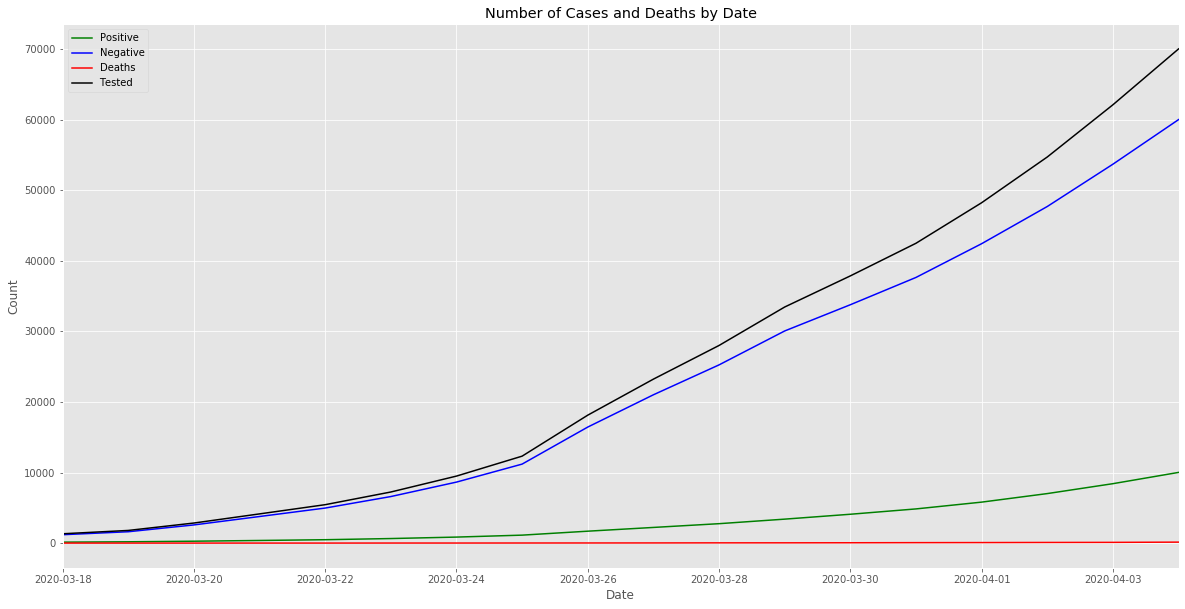

In [6]:
style.use('ggplot')
ax = plt.gca()
df.plot(kind='line',x='Date',y='Positive', color='green', ax=ax, figsize=(20,10))
df.plot(kind='line',x='Date',y='Negative', color='blue', ax=ax)
df.plot(kind='line',x='Date',y='Deaths', color='red', ax=ax)
df.plot(kind='line',x='Date',y='Tested', color='black', ax=ax)
plt.title('Number of Cases and Deaths by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [7]:
df_percent = pd.DataFrame(df, columns=['Date', 'Positive_Percent','Negative_Percent'])
df_percent.set_index("Date", inplace = True) 
df_percent.head(5)

,Positive_Percent,Negative_Percent
Date,,
2020-03-18,10.1,89.9
2020-03-19,10.3,89.7
2020-03-20,9.4,90.6
2020-03-21,9.0,91.0
2020-03-22,8.8,91.2


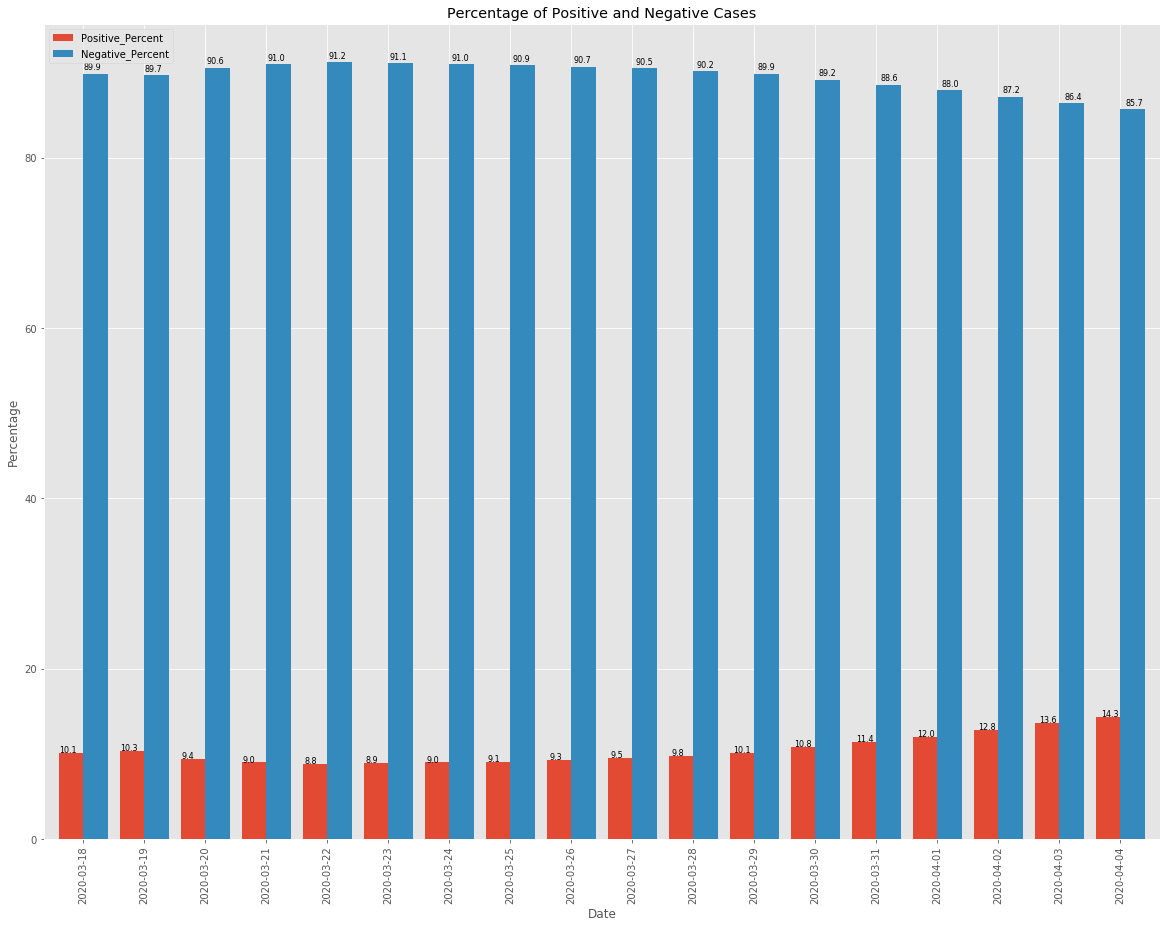

In [8]:
style.use('ggplot')
bar_chart = df_percent.plot.bar(stacked=False, width=0.8, figsize=(20,15), title="Percentage of Positive and Negative Cases")
plt.xlabel('Date')
plt.ylabel('Percentage')
bar_chart.legend(loc=2)  
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=8)
plt.show()

## Deeper Dive into Cases By County

In [9]:
# Load dataset group by county
df_counties = pd.read_csv("pa_county.csv")
df_counties.head()

,Date,County,Cases,Deaths
0,2020-04-04,Adams,21,0
1,2020-04-04,Allegheny,552,3
2,2020-04-04,Armstrong,12,0
3,2020-04-04,Beaver,69,6
4,2020-04-04,Bedford,4,0


In [10]:
county_name = 'Chester'
df_county = df_counties[df_counties['County']== county_name]
df_county = df_county.sort_values('Date', ascending = True)
df_county.head()

,Date,County,Cases,Deaths
811,2020-03-18,Chester,9,0
790,2020-03-19,Chester,10,0
765,2020-03-20,Chester,17,0
738,2020-03-21,Chester,19,0
705,2020-03-22,Chester,23,0


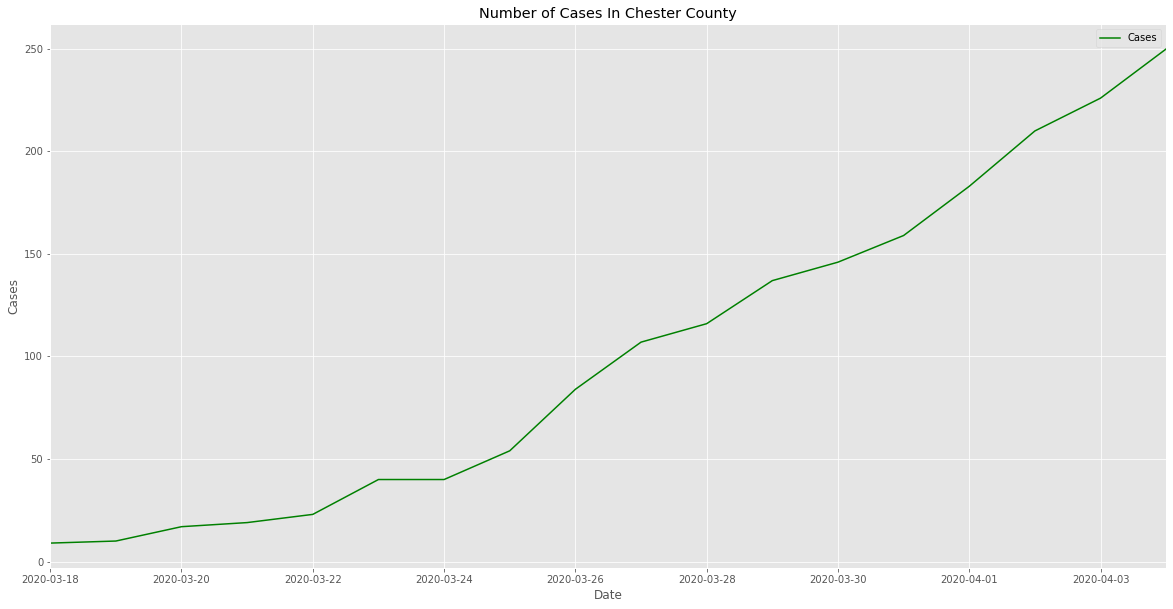

In [11]:
style.use('ggplot')
ax = plt.gca()
df_county.plot(kind='line',x='Date',y='Cases', color='green', ax=ax, figsize=(20,10))
plt.title('Number of Cases In ' + county_name +' County')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.show()

## Select a County to See the Cases

**Note: The widget may not shown properly when view from GitHub**

In [12]:
# Unique County Names from Dataset
county_name_list = df_counties['County'].unique()
county_name_list = county_name_list.tolist()
county_name_list.insert(0, 'Select One')
print('Unique County Names: %d' % len(county_name_list))

Unique County Names: 66


## The following section require Jupyter Widgets to display properly ##

https://ipywidgets.readthedocs.io/en/latest/index.html

**Two Options to Install:**

* Conda
    * conda install -c conda-forge ipywidgets
* PIP
    * pip install ipywidgets
    * jupyter nbextension enable --py widgetsnbextension

Dropdown(description='County:', index=48, options=('Select One', 'Adams', 'Allegheny', 'Armstrong', 'Beaver', …

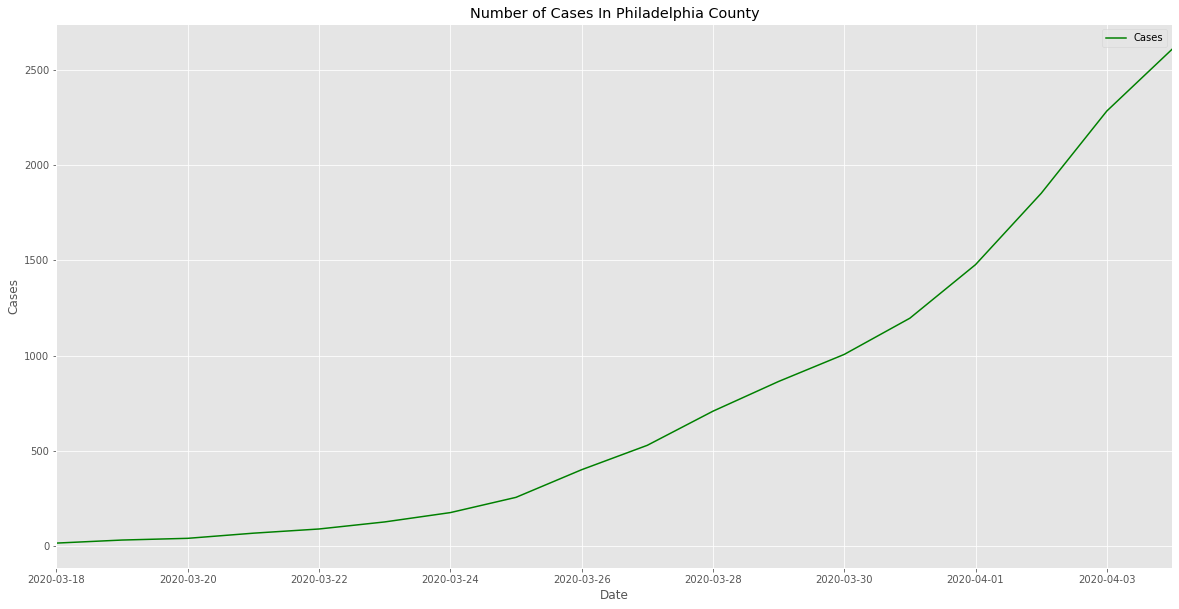

In [13]:
import ipywidgets as widgets
from IPython.display import clear_output

default_county = 'Philadelphia'
country_widget = widgets.Dropdown(
    options= county_name_list,
    value= default_county,
    description='County:',
)

def refresh_chart(county_name):
    # reset plot and widget
    clear_output(wait=True)
    display(country_widget)
    if county_name != 'Select One':
        df_counties = pd.read_csv("pa_county.csv")
        df_county = df_counties[df_counties['County'] == county_name]
        df_county = df_county.sort_values('Date', ascending = True)
        style.use('ggplot')
        ax = plt.gca()
        df_county.plot(kind='line',x='Date',y='Cases', color='green', ax=ax, figsize=(20,10))
        plt.title('Number of Cases In ' + county_name +' County')
        plt.xlabel('Date')
        plt.ylabel('Cases')
        plt.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        refresh_chart(change['new'])
        
country_widget.observe(on_change)
display(country_widget)
refresh_chart(default_county)

----

## Display County Data in an Interactive Map using Folium ##


Reference: https://python-visualization.github.io/folium/modules.html

* Data Preparation
    * Perform Left Outer Join of pa_county and pa_county_geolocation dataset
* Data Visulization
    * Show positive cases for each county in a Map
    * Show number of cases on popup
    * Color Codes to categorize number of cases
        * **Red**: 100 or more
        * **Orange**: over 10 but below 100
        * **Green**: below 10

------


In [14]:
# County Geolocation Dataset
df_geo = pd.read_csv("pa_county_geolocation.csv")
df_geo.head(5)

,County,Latitude,Longitude
0,Pike,40.486231,-76.005528
1,Butler,40.861021,-79.895225
2,Adams,39.783730,-100.445882
3,Blair,40.487075,-78.368233
4,Cumberland,40.154158,-77.280393


In [15]:
# Add Lat/Long to County Dataframe using Left Outer-join
df_county_with_geo = df_counties.merge(df_geo, how='left', on=['County'])
#df_county_with_geo.set_index("Date", inplace = True) 
df_county_with_geo.head()

,Date,County,Cases,Deaths,Latitude,Longitude
0,2020-04-04,Adams,21,0,39.783730,-100.445882
1,2020-04-04,Allegheny,552,3,39.996677,-75.113107
2,2020-04-04,Armstrong,12,0,41.094228,-80.051725
3,2020-04-04,Beaver,69,6,40.691662,-80.371000
4,2020-04-04,Bedford,4,0,40.027145,-78.523745


In [16]:
df_latest_county = df_county_with_geo[df_county_with_geo['Date'] == df_county_with_geo['Date'].max()]
del df_latest_county['Date']
del df_latest_county['Deaths']
#del df_latest_county['County']
df_latest_county.head()

,County,Cases,Latitude,Longitude
0,Adams,21,39.783730,-100.445882
1,Allegheny,552,39.996677,-75.113107
2,Armstrong,12,41.094228,-80.051725
3,Beaver,69,40.691662,-80.371000
4,Bedford,4,40.027145,-78.523745


In [17]:
import folium as folium

In [21]:
# Center Map on State College, PA
center_point = [40.798214,-77.859909]

# Function to color code categories for number of positive cases
def get_icon_color(cases):
    if cases <= 10:
        return 'green'
    elif cases > 10 and cases < 100:
        return 'orange'
    else:
        return 'red'

county_map = folium.Map(location=center_point, zoom_start=7)

popup_text = "<div style=\"width:150px;\">{}: {}</div>"

# Display Data Points
for row in df_latest_county.itertuples():
    county_map.add_child(
         folium.Marker(location=[row.Latitude, row.Longitude],
            popup=popup_text.format(row.County, row.Cases),
            icon=folium.Icon(color=get_icon_color(row.Cases), icon="medkit", prefix="fa"))
    )

# Add Category Legend
legend_html = """
<div style="position:fixed;
     bottom: 50px; 
     left: 50px; 
     width: 120px; 
     height: 90px; 
     border:2px solid grey; 
     z-index: 9999;
     font-size:14px;">
     &nbsp;<b>Positive Cases:</b><br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:green"></i>&nbsp;Under 10<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:orange"></i>&nbsp;Under 100<br>
     &nbsp;<i class="fa fa-circle fa-1x" style="color:red"></i>&nbsp;Over 100
</div>"""
county_map.get_root().html.add_child(folium.Element(legend_html))

# Display Map
display(county_map)